# Image Classification

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#Reading path
data_train_path = r'C:\Users\Nikitha\Documents\Data Science Projects\Image Classification\Images\Fruits_Vegetables\Fruits_Vegetables\train'
data_test_path = r'C:\Users\Nikitha\Documents\Data Science Projects\Image Classification\Images\Fruits_Vegetables\Fruits_Vegetables\test'
data_val_path = r'C:\Users\Nikitha\Documents\Data Science Projects\Image Classification\Images\Fruits_Vegetables\Fruits_Vegetables\validation'


In [3]:
#Setting image height and width
img_width = 180
img_height = 180

In [4]:
#Creating a dataset for training using TensorFlow and keras
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split = False)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
# Load the validation dataset with images resized and batched, without shuffling.

data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle = False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split = False)

Found 351 files belonging to 36 classes.


In [7]:
# Load the test dataset with images resized and batched, without shuffling.

data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split = False)

Found 359 files belonging to 36 classes.


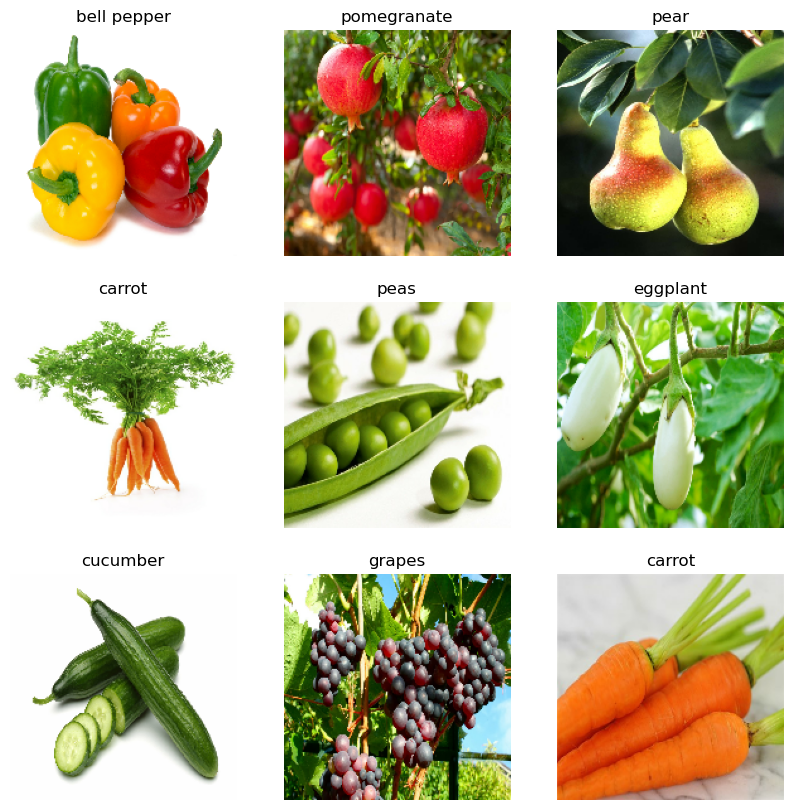

In [8]:
#Plotting the figures
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
#Building a sequential model
model = Sequential([
    layers.Rescaling(1./255), #Every image's color will stored in RGB format
    layers.Conv2D(16,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2), #Makes sure model is not overfitting
    layers.Dense(128),
    layers.Dense(len(data_cat))
    
])

In [11]:
#Compiling the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [12]:
epochs_size = 25
history = model.fit(data_train, validation_data= data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 467ms/step - accuracy: 0.0496 - loss: 3.8208 - val_accuracy: 0.2365 - val_loss: 2.8529
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 380ms/step - accuracy: 0.2080 - loss: 2.8086 - val_accuracy: 0.5157 - val_loss: 1.8450
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 377ms/step - accuracy: 0.3784 - loss: 2.1611 - val_accuracy: 0.7578 - val_loss: 1.0754
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 375ms/step - accuracy: 0.5250 - loss: 1.6440 - val_accuracy: 0.8120 - val_loss: 0.7453
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 389ms/step - accuracy: 0.6806 - loss: 1.1031 - val_accuracy: 0.8946 - val_loss: 0.5260
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 382ms/step - accuracy: 0.8044 - loss: 0.6735 - val_accuracy: 0.9259 - val_loss: 0.5011
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 374ms/step - accuracy: 0.8849 - loss: 0.4218 - val_accuracy: 0.9288 - val_loss: 0.4447
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 349ms/step - accuracy: 0.9257 - loss: 0.3350 - val_accu

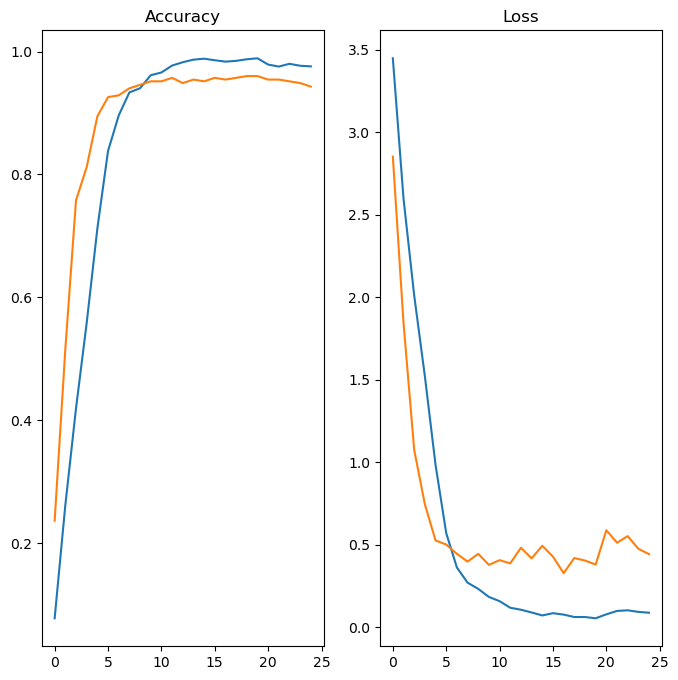

In [13]:
# Plot training and validation accuracy and loss over epochs.

epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label='Validation Loss')
plt.title('Loss')
plt.show()

In [15]:
# Load and preprocess the image for model prediction, resizing and batching it.

image = 'C:/Users/Nikitha/Documents/Data Science Projects/Image Classification/Images/Prediction_Images/banana.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
image_arr = tf.keras.utils.array_to_img(image) #Converting to array
image_bat=tf.expand_dims(image_arr,0)

In [16]:
# Use the trained model to make predictions on the preprocessed image batch.

predict = model.predict(image_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


In [17]:
# Apply the softmax function to the model's predictions to obtain class probabilities.

score = tf.nn.softmax(predict)

In [18]:
# Print the predicted class label and its associated confidence score for the given image.

print('The given image is a {} and the accuracy is {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

The given image is a banana and the accuracy is 74.58


In [19]:
# Save the trained model to a file named 'Image_classify.keras'.

model.save('Image_classify.keras')